In [1]:
import pandas as pd

In [2]:
df = pd.read_csv ('./dataset/vix.csv', encoding='unicode_escape')

In [3]:
df

,time,close
0,1990-01-03T09:10:00+01:00,18.19
1,1990-01-04T09:10:00+01:00,19.22
2,1990-01-05T09:10:00+01:00,20.11
3,1990-01-08T09:10:00+01:00,20.26
4,1990-01-09T09:10:00+01:00,22.20
...,...,...
8277,2022-11-10T09:10:00+01:00,23.52
8278,2022-11-11T09:10:00+01:00,22.53
8279,2022-11-14T09:10:00+01:00,23.72
8280,2022-11-15T09:10:00+01:00,24.53


In [4]:
df['time'] = df['time'].str.extract('(\d{4}-\d{2}-\d{2})', expand=True)

In [5]:
df['time'] = pd.to_datetime(df["time"])
df.set_index('time', inplace=True)

In [6]:
df_reindexed = df.reindex(pd.date_range(start=df.index.min(),
                                                  end=df.index.max(),
                                                  freq='1D'))

In [7]:
df_reindexed

,close
1990-01-03,18.19
1990-01-04,19.22
1990-01-05,20.11
1990-01-06,NaN
1990-01-07,NaN
...,...
2022-11-12,NaN
2022-11-13,NaN
2022-11-14,23.72
2022-11-15,24.53


In [8]:
df_reindexed.interpolate(method='linear', inplace=True)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("white")

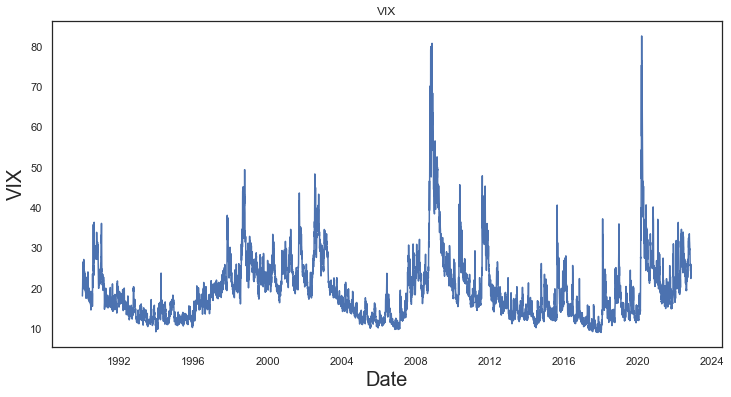

In [11]:
plt.plot(df_reindexed, color= 'b')
plt.title('VIX')
plt.xlabel('Date', fontsize= 20)
plt.ylabel('VIX', fontsize= 20)
plt.style.use('seaborn')